In [1]:
using PyPlot
plt = PyPlot

PyPlot

In [2]:
include("optsaving.jl")

T (generic function with 1 method)

In [3]:
self.x_grid_size=200

200

In [4]:
self.x_grid_max=120

120

In [5]:
v_star, π = value_function_iteration(self)

Error at iteration25 is 0.07948226408694747
Error at iteration50 is 0.02861185713829073
Error at iteration75 is 0.010307131238097789
Error at iteration100 is 0.0037138476704612344
Error at iteration125 is 0.0013382977917508754
Error at iteration150 is 0.00048228443481868055
Error at iteration175 is 0.00017380649731180142

Converged in 189 iterations.

([-4.48984 -4.46843 … -4.15637 -4.14073; -4.46344 -4.44454 … -4.14871 -4.13315; … ; -3.15526 -3.15151 … -3.04408 -3.04024; -3.15058 -3.14684 … -3.04216 -3.03849], [1 1 … 19 21; 1 1 … 19 21; … ; 186 187 … 200 200; 187 188 … 200 200])

In [6]:
x = self.x_grid
Q = self.Q

function simulate_assets(i_init=100, j_init=1, ts_length=10000,seed=1234)
    srand(seed)
    i_series = rand(Int, ts_length)
    i_series[1] = i_init
    j = j_init
    for t=1:(ts_length-1)

        i_series[t+1] = π[i_series[t], j]
        d = DiscreteRV(Q[j, :])
        j = rand(d)

    end
        
    return x[i_series]
end
        

simulate_assets (generic function with 5 methods)

In [7]:
x_series = simulate_assets()

10000-element Array{Float64,1}:
 7.46231 
 6.48241 
 6.55779 
 6.48241 
 6.40704 
 5.95477 
 5.80402 
 5.72864 
 5.65327 
 5.80402 
 5.8794  
 5.72864 
 5.8794  
 ⋮       
 0.979899
 0.678392
 0.376884
 0.226131
 0.527638
 0.829146
 0.753769
 0.979899
 1.13065 
 0.904523
 0.904523
 0.829146

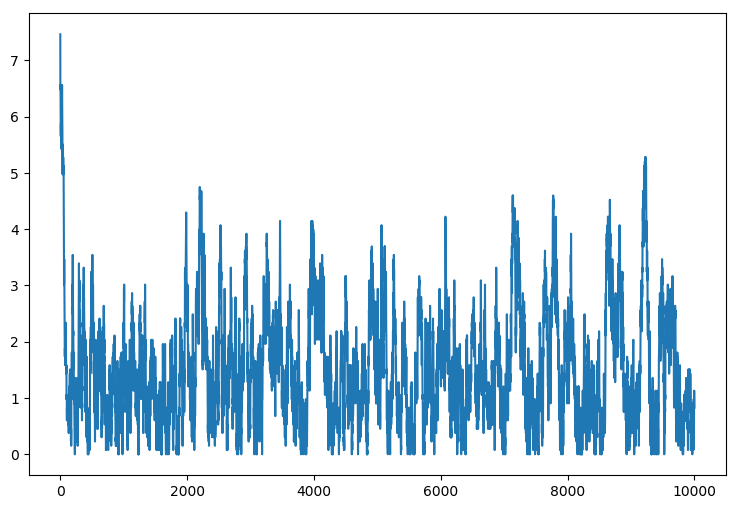

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
ax[:plot](x_series)
plt.show()